### AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

### Week 3: Deep Learning Basics for Computer Vision

## **Convolutional Neural Networks (CNNs) for Computer Vision**

### **1. VGG Networks**

#### **VGG Architecture**

**VGG16** and **VGG19** are deep convolutional networks known for their simplicity and effectiveness in image classification tasks.

**Key Characteristics:**
- Utilizes \(3 \times 3\) convolutional filters.
- Stacked convolutional layers are followed by max-pooling layers.
- The network ends with fully connected layers.

**Model Architectures:**
- **VGG16**: 16 layers (13 convolutional layers + 3 fully connected layers)
- **VGG19**: 19 layers (16 convolutional layers + 3 fully connected layers)

**Model Architecture Image:**

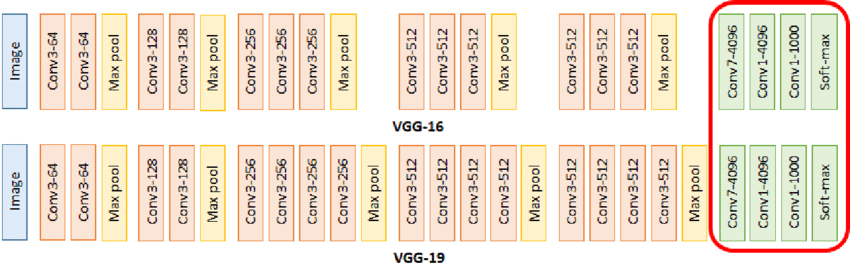


**Applications:**
- Image classification
- Feature extraction for transfer learning

**Advantages:**
- Uniform and simple architecture.
- Effective feature extraction through multiple layers.

**Disadvantages:**
- Computationally intensive due to a large number of parameters.
- Prone to overfitting on smaller datasets.

**Keras Implementation:**


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the VGG16 model
model = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(1000, activation='softmax')  # Adjust the output units based on your classification task
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [2]:
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model

# Load VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=True)
# Load VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=True)

# Print model summaries
vgg16_model.summary()


574710816/574710816 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
class_list = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

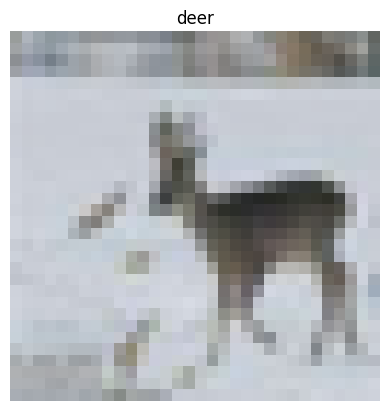

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[20])
plt.title(class_list[y_train[20][0]])
plt.axis('off')
plt.show()

In [14]:
from re import S
# VGG16 for Cifar dataset
model = models.Sequential([
      # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')  # Adjust the output units based on your classification task
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# normilize
x_valid = x_train[:5000]
x_train = x_train[5000:]
y_valid = y_train[:5000]
y_train = y_train[5000:]

x_valid = x_valid / 255.0
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
train_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
 321/1407 [=====>........................] - ETA: 1:13:26 - loss: 2.3032 - accuracy: 0.0997

KeyboardInterrupt: 

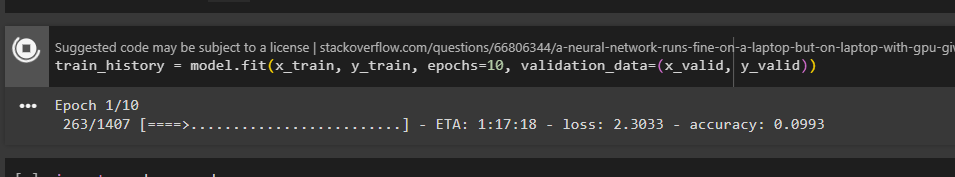

In [11]:
with tf.device('/device:GPU:0'):
  model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
1407/1407 [==============================] - 58s 35ms/step - loss: 2.3052 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 2/10
1407/1407 [==============================] - 48s 34ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/10
1407/1407 [==============================] - 48s 34ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 4/10
1407/1407 [==============================] - 49s 35ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 5/10
1407/1407 [==============================] - 47s 34ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 6/10
1407/1407 [==============================] - 47s 34ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.0920
Epoch 7/10
1407/1407 [==============================] - 48s 34ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3029 -

In [ ]:
import pandas as pd

pd.DataFrame(train_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### **2. ResNet (Residual Networks)**

#### **ResNet Architecture**

ResNet, short for Residual Network, is a type of deep neural network architecture designed to address the problem of training very deep networks. Introduced by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition," ResNet won the ImageNet competition by a significant margin. The key innovation of ResNet is the introduction of residual connections, or skip connections, which help in training deep networks more effectively.

Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.


ResNet first introduced the concept of skip connection. The diagram below illustrates skip connection. The figure on the left is stacking convolution layers together one after the other. On the right we still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called skip connection

![image.png](attachment:4da2a3cb-f11a-4b6d-90d4-908f174a15b8.png)

Reproduced from <a href="https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf">He et al 2016.</a>

![image.png](attachment:fab914a7-7a47-49f9-bdc6-8dca9c9d96bb.png)

#### **2.4. Residual Block**

- A **residual block** is the building block of ResNet. It consists of two or more convolutional layers, along with a shortcut connection that skips these layers and adds the input to the output. This helps in mitigating the vanishing gradient problem and allows for deeper networks.

#### **2.5. Shortcut Connections**

- **Shortcut connections** (or skip connections) are used to bypass one or more layers in the network. In ResNet, these connections add the input of a block to its output, allowing gradients to flow through the network more easily and facilitating the training of very deep models.

![image.png](attachment:0eddfecf-1d3b-45fa-a597-4eba7f4b00bf.png)

### **3. ResNet Architecture**

#### **3.1. Basic Structure**


- **Initial Layer**: The network starts with a single convolutional layer followed by batch normalization and activation (ReLU). This is often followed by a max-pooling layer.

- **Residual Blocks**: Multiple residual blocks are stacked together. Each block consists of two convolutional layers, batch normalization, and ReLU activation. The output of each block is added to its input via the shortcut connection.

- **Final Layers**: After several residual blocks, the network typically includes a global average pooling layer followed by a dense layer to produce the final classification output.

![image.png](attachment:98318d2d-8f42-4f22-8baa-0c4523254b33.png)

#### **3.2. Convolutional Parameters**

- **Stride**: The stride determines how much the filter moves during the convolution operation. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 means it moves two pixels at a time, reducing the spatial dimensions of the feature map.

- **Padding**: Padding adds extra pixels around the borders of the input image to control the spatial dimensions of the output feature map. Common padding types are 'valid' (no padding) and 'same' (padding such that the output has the same dimensions as the input).

- **Pooling**: Pooling operations, such as max pooling, reduce the spatial dimensions of the feature maps. This helps in reducing computational complexity and controlling overfitting.

### **4. Benefits of ResNet**

- **Easier Training**: Residual connections make it easier to train very deep networks by mitigating the vanishing gradient problem.

- **Improved Accuracy**: ResNet architectures often achieve better accuracy compared to traditional deep networks.

- **Flexibility**: ResNet can be adapted to various tasks and datasets, making it a versatile model for different applications.

### **5. Implementation in Keras**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=True)

# Print model summaries
resnet50_model.summary()